# chapter 13

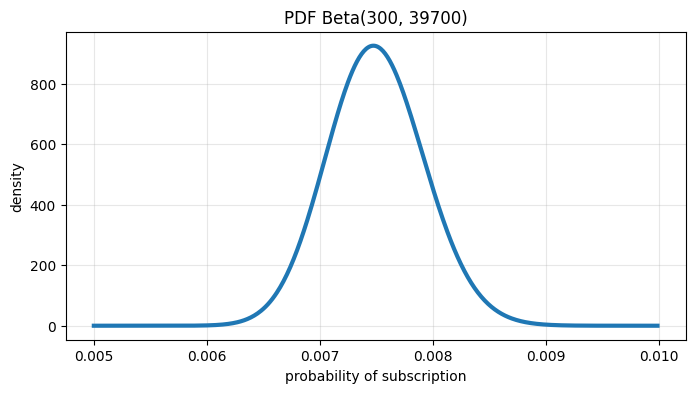

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# parámetros de la distribución
a, b = 300, 40000 - 300

# rango de valores de probabilidad
xs = np.arange(0.005, 0.01, 0.00001)

# densidad de la Beta en esos puntos
ys = beta.pdf(xs, a, b)

# graficar
plt.figure(figsize=(8, 4))
plt.plot(xs, ys, linewidth=3)
plt.title("PDF Beta(300, 39700)")
plt.xlabel("probability of subscription")
plt.ylabel("density")
plt.grid(alpha=0.3)
plt.show()


In [2]:
beta.cdf(0.0065, a, b)

np.float64(0.007978686170755709)

In [3]:
# qbeta(0.999,300,39700)
beta.ppf(0.999, 300, 39700)

np.float64(0.008903462119425345)

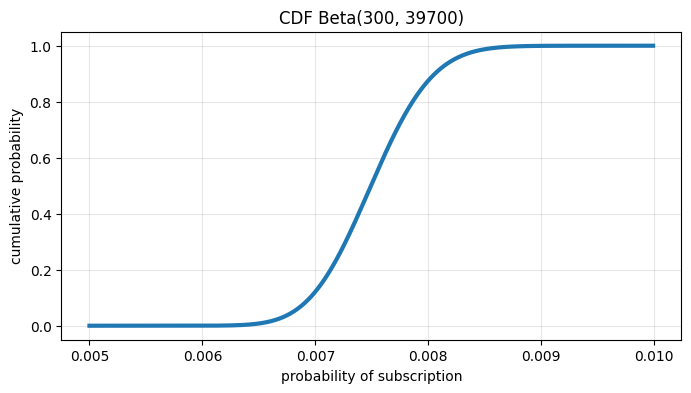

In [4]:
# graficar CDF
# rango de valores de probabilidad
xs = np.arange(0.005, 0.01, 0.00001)

ys = beta.cdf(xs, a, b)

# graficar
plt.figure(figsize=(8, 4))
plt.plot(xs, ys, linewidth=3)
plt.title("CDF Beta(300, 39700)")
plt.xlabel("probability of subscription")
plt.ylabel("cumulative probability")
plt.grid(alpha=0.3)
plt.show()


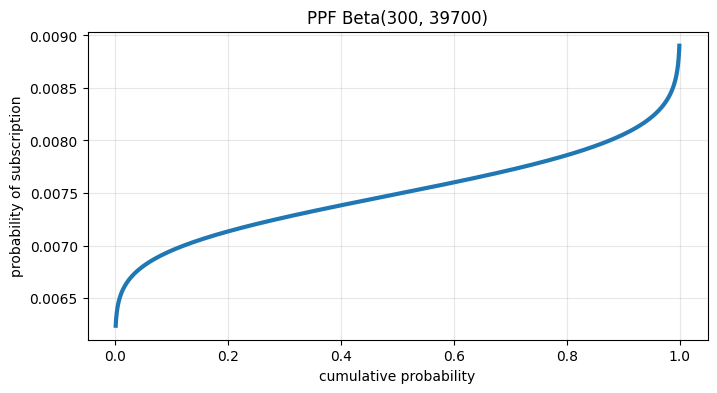

In [5]:
# graficar cuantiles
# rango de valores de probabilidad
xs = np.arange(0.001, 0.999, 0.00001)

ys = beta.ppf(xs, a, b)

# graficar
plt.figure(figsize=(8, 4))
plt.plot(xs, ys, linewidth=3)
plt.title("PPF Beta(300, 39700)")
plt.xlabel("cumulative probability")
plt.ylabel("probability of subscription")
plt.grid(alpha=0.3)
plt.show()


In [6]:
"""
Returning to the task of measuring snowfall from Chapter 10, say you have the following measurements (in inches) of snowfall:
7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4
What is your 99.9 percent confidence interval for the true value of snowfall?

"""

import numpy as np
from scipy.stats import norm

# datos
snow = np.array([7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4])

# media y desvío estándar
snow_mean = np.mean(snow)
snow_sd = np.std(snow, ddof=1)   # ddof=1 para usar n-1 (igual que R)

# intervalos de confianza del 99.9%
lower = norm.ppf(0.0005, loc=snow_mean, scale=snow_sd)
upper = norm.ppf(0.9995, loc=snow_mean, scale=snow_sd)

print(f"Mean: {snow_mean:.2f}, SD: {snow_sd:.2f}")
print(f"99.9% Confidence Interval: ({lower:.2f}, {upper:.2f})")

Mean: 8.19, SD: 1.13
99.9% Confidence Interval: (4.46, 11.92)


In [7]:
"""
A child is going door to door selling candy bars. So far she has visited 30 houses and sold 10 candy bars. 
She will visit 40 more houses today. 
What is the 95 percent confidence interval for how many candy bars she will sell the rest of the day?
"""
n = 30

a = 10
b = n - a



lower_percent = beta.ppf(0.025, a, b)
upper_percent = beta.ppf(0.975, a, b)

future_houses = 40
lower_sells = lower_percent * future_houses
upper_sells = upper_percent * future_houses

print(f"95% Confidence Interval percents: ({lower_percent:.2f}, {upper_percent:.2f})")
print(f"95% Confidence Interval sells: ({lower_sells}, {upper_sells})")

95% Confidence Interval percents: (0.18, 0.51)
95% Confidence Interval sells: (7.175345969404473, 20.332934152399602)


# chapter 14

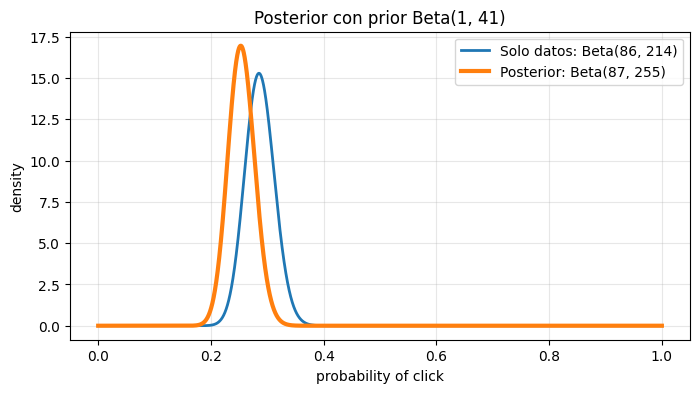

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# datos observados
mails_opened = 300
clicks = 86

# 1) "solo datos" -> Beta(k, n-k)
a_data = clicks
b_data = mails_opened - clicks

# 2) prior Beta(1, 41)
a_prior, b_prior = 1, 41

# posterior con prior Beta(1,41): Beta(a0 + k, b0 + n - k)
a_post = a_prior + clicks
b_post = b_prior + (mails_opened - clicks)

# rango de valores de probabilidad
xs = np.arange(0.0001, 1, 0.0001)

# densidades
ys_data = beta.pdf(xs, a_data, b_data)      # solo datos
ys_prior = beta.pdf(xs, a_prior, b_prior)   # prior
ys_post = beta.pdf(xs, a_post, b_post)      # posterior (prior + datos)

# graficar
plt.figure(figsize=(8, 4))
plt.plot(xs, ys_data, linewidth=2, label=f"Solo datos: Beta({a_data}, {b_data})")
#plt.plot(xs, ys_prior, linewidth=2, linestyle="--", label=f"Prior: Beta({a_prior}, {b_prior})")
plt.plot(xs, ys_post, linewidth=3, label=f"Posterior: Beta({a_post}, {b_post})")

plt.title("Posterior con prior Beta(1, 41)")
plt.xlabel("probability of click")
plt.ylabel("density")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


## Ejercicios

1. Suppose you’re playing air hockey with some friends and flip a coin to see who starts with the puck. After playing 12 times, you realize that the friend who brings the coin almost always seems to go first: 9 out of 12 times. Some of your other friends start to get suspicious. Define prior probability distributions for the following beliefs:
- One person who weakly believes that the friend is cheating and the true rate of coming up heads is closer to 70 percent.
- One person who very strongly trusts that the coin is fair and provided a 50 percent chance of coming up heads.
- One person who strongly believes the coin is biased to come up heads 70 percent of the time.


2. To test the coin, you flip it 20 more times and get 9 heads and 11 tails. Using the priors you calculated in the previous question, what are the updated posterior beliefs in the true rate of flipping a heads in terms of the 95 percent confidence interval?

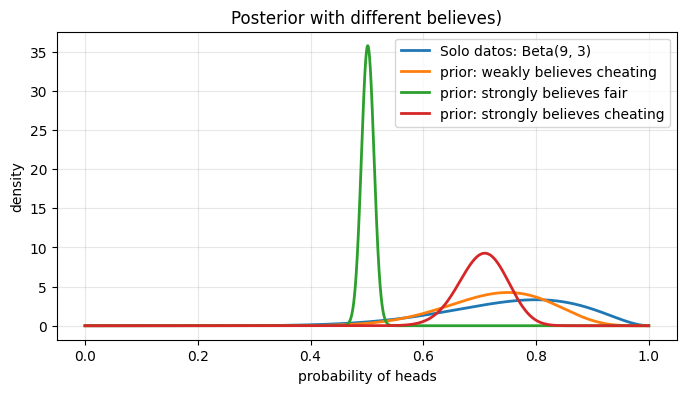

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# datos observados
heads = 9
throws = 12


# 1) "solo datos" -> Beta(k, n-k)
a_data = heads
b_data = throws - heads

# 2) prior Beta(1, 41)

prior_weak_cheat_a, prior_weak_cheat_b = 7, 3
prior_strong_fair_a, prior_strong_fair_b = 1000, 1000
prior_strong_cheat_a, prior_strong_cheat_b = 70, 30

# posterior con prior 
a_post_1, b_post_1 = a_data + prior_weak_cheat_a, b_data + prior_weak_cheat_b
a_post_2, b_post_2 = a_data + prior_strong_fair_a, b_data + prior_strong_fair_b
a_post_3, b_post_3 = a_data + prior_strong_cheat_a, b_data + prior_strong_cheat_b


# rango de valores de probabilidad
xs = np.arange(0.0001, 1, 0.0001)

# densidades
ys_data = beta.pdf(xs, a_data, b_data)      # solo datos
ys_post_1 = beta.pdf(xs, a_post_1, b_post_1)
ys_post_2 = beta.pdf(xs, a_post_2, b_post_2)
ys_post_3 = beta.pdf(xs, a_post_3, b_post_3)


# graficar
plt.figure(figsize=(8, 4))
plt.plot(xs, ys_data, linewidth=2, label=f"Solo datos: Beta({a_data}, {b_data})")
plt.plot(xs, ys_post_1, linewidth=2, label=f"prior: weakly believes cheating")
plt.plot(xs, ys_post_2, linewidth=2, label=f"prior: strongly believes fair")
plt.plot(xs, ys_post_3, linewidth=2, label=f"prior: strongly believes cheating")



plt.title("Posterior with different believes)")
plt.xlabel("probability of heads")
plt.ylabel("density")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [10]:
print("a")

a


# chapter 15

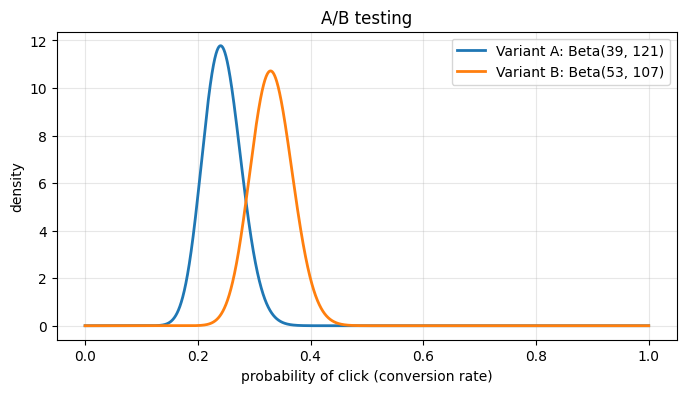

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# prior: se clickea el 30% de los mails
prior_alfa = 3
prior_beta = 7

total_population = 600
testing_population = 300

# A/B test "remover imagen" con 300 usuarios (150 en cada grupo)
# Variant A: with image
a_alfa = 36
a_beta = 114

# Variant B: without image
b_alfa = 50
b_beta = 100

# 2) prior Beta(1, 41)
a_prior, b_prior = 1, 41

# posterior con prior 
a_alfa_posterior = prior_alfa + a_alfa
a_beta_posterior = prior_beta + a_beta

b_alfa_posterior = prior_alfa + b_alfa
b_beta_posterior = prior_beta + b_beta

# rango de valores de probabilidad
xs = np.arange(0.0001, 1, 0.0001)

# densidades
ys_a = beta.pdf(xs, a_alfa_posterior, a_beta_posterior)
ys_b = beta.pdf(xs, b_alfa_posterior, b_beta_posterior)

# graficar
plt.figure(figsize=(8, 4))
plt.plot(xs, ys_a, linewidth=2, label=f"Variant A: Beta({a_alfa_posterior}, {a_beta_posterior})")
plt.plot(xs, ys_b, linewidth=2, label=f"Variant B: Beta({b_alfa_posterior}, {b_beta_posterior})")


plt.title("A/B testing")
plt.xlabel("probability of click (conversion rate)")
plt.ylabel("density")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [12]:
trials  = 100_000
a_samples = beta.rvs(a_alfa_posterior, a_beta_posterior, size=trials)
b_samples = beta.rvs(b_alfa_posterior, b_beta_posterior, size=trials)

In [13]:
a_samples

array([0.26439911, 0.2303477 , 0.2287631 , ..., 0.31988412, 0.22090728,
       0.24569805], shape=(100000,))

In [14]:
p_b_superior = sum(b_samples > a_samples) / trials
p_b_superior

np.float64(0.9572)

In [15]:
how_much_better = b_samples/a_samples
how_much_better

array([1.32032682, 1.35385882, 1.4316262 , ..., 1.14969005, 1.30073972,
       1.12859566], shape=(100000,))

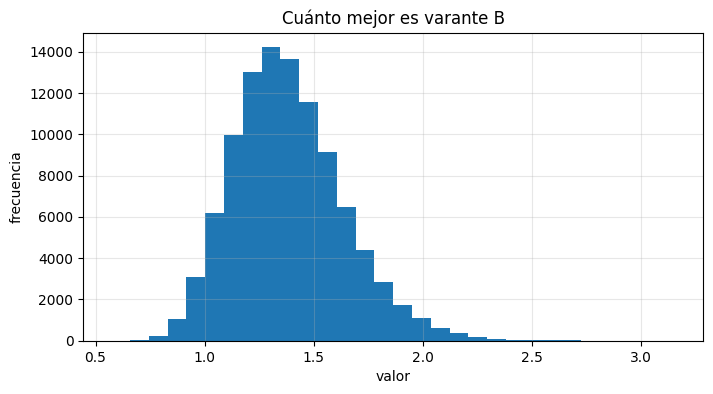

In [16]:
plt.figure(figsize=(8, 4))
plt.hist(how_much_better, bins=30)
plt.title("Cuánto mejor es varante B")
plt.xlabel("valor")
plt.ylabel("frecuencia")
plt.grid(alpha=0.3)
plt.show()
# vemos que alrededor de 40% mejor

# Chapter 16

1. Returning to the dice problem, assume that your friend made a mistake and suddenly realized that there were, in fact, two loaded dice and only one fair die. How does this change the prior, and therefore the posterior odds, for our problem? Are you more willing to believe that the die being rolled is the loaded die?

In [17]:
total_dice = 3
loaded_dice = 2
balanced_dice = total_dice - loaded_dice

throws = [6, 1, 3, 6, 4, 5, 6, 1, 2, 6]
total_throws = len(throws)
sixes = throws.count(6)
other_numbers = total_throws - sixes

In [18]:
# bayes factor stays the same
# P(D | H1) / P(D | H2)
# H1: loaded die (half the time roll a 6)
# H2: balanced died (1/6 of the time roll a 6)

p_d_h1 = ((1/2) ** sixes) * (((1/2) ** other_numbers)) 
p_d_h2 = ((1/6) ** sixes) * (((5/6) ** other_numbers)) 

bayes_factor = p_d_h1 / p_d_h2
print(f"bayes factor: {bayes_factor}")

bayes factor: 3.7791359999999994


In [19]:
# prior odds
# O(H1) = P(H1) / P(H2)
p_h1 = loaded_dice / total_dice
p_h2 = balanced_dice / total_dice

o_h1 = p_h1 / p_h2
print(f"prior odds on h1 {o_h1}")

prior odds on h1 2.0


In [20]:
# posterior odds
# Posterior odds = prior odds * bayes factor = O(H1) x P(D | H1) / P(D | H2)
posterior_odds = o_h1 * bayes_factor
print(f"posterior_odds: {posterior_odds}")

posterior_odds: 7.558271999999999


2. Returning to the rare diseases example, suppose you go to the doctor, and after having your ears cleaned you notice that your symptoms persist. Even worse, you have a new symptom: vertigo. The doctor proposes another possible explanation, labyrinthitis, which is a viral infection of the inner ear in which 98 percent of cases involve vertigo. However, hearing loss and tinnitus are less common in this disease; hearing loss occurs only 30 percent of the time, and tinnitus occurs only 28 percent of the time. Vertigo is also a possible symptom of vestibular schwannoma, but occurs in only 49 percent of cases. In the general population, 35 people per million contract labyrinthitis annually. What is the posterior odds when you compare the hypothesis that you have labyrinthitis against the hypothesis that you have vestibular schwannoma?

In [21]:
# h1 labyrinthitis
# h2 = schwannoma

# bayes factor
# how well the hipotesis explain the data
# hearing loss, tinnitus, vertigo
p_d_h1 = 0.3 * 0.28 * 0.98
p_d_h2 = 0.94 * 0.83 * 0.49

bayes_factor = p_d_h1 / p_d_h2
print(p_d_h1)
print(p_d_h2)
print(f"bayes factor {bayes_factor}")

0.08232
0.3822979999999999
bayes factor 0.21532940271725204


In [22]:
# prior odds
o_h1 = 35 / 11
print(f"prior odds {o_h1}")

prior odds 3.1818181818181817


In [23]:
posterior_odds = o_h1 * bayes_factor

print(f"posterior odds {posterior_odds}")

posterior odds 0.6851390086458019
